# Question 1

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets

### Loading the data

In [163]:
iris = datasets.load_iris()
X = iris.data[:,:2] #Taking only sepal length and width as x
Y = iris.target

### Visuvalising the data

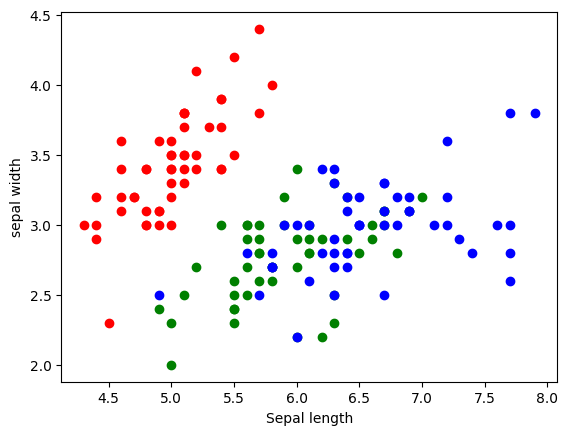

In [164]:
fig,ax = plt.subplots()
for i in range(len(Y)):
    if Y[i] == 0:
        colour = 'red'
    elif Y[i] == 1:
        colour = 'Green'
    else:
        colour = 'blue'
    ax.scatter(X[i,0],X[i,1], color = colour, label = label1)
plt.xlabel('Sepal length')
plt.ylabel('sepal width')
# plt.legend(loc = 'upper left')
plt.show()

### Spllitng the data into test and train

In [165]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

### Creating the model

In [166]:
model = make_pipeline(StandardScaler(), SVC(gamma = 'auto'))
model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

### Testing the model

In [94]:
pred = model.predict(X_test)
print(pred)

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 1 0 1 0 1 2 2 1 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]


### Confusion matrix

In [231]:
def Confusion_matrix(actual, pred):
    classes = np.unique(actual)
    confusion_matrix = np.zeros((len(classes), len(classes)))
    for i in range(len(classes)):
        for j in range(len(classes)):
            confusion_matrix[i,j] = np.sum((actual == classes[i]) & (pred == classes[j]))
    return confusion_matrix
def metrics(confusion_matrix__):
    precision__ = []
    recall__ = []
    for i in range(len(confusion_matrix__)):
        for j in range(len(confusion_matrix__)):
            if i == j:
                precision__.append(confusion_matrix__[i,j]/sum(confusion_matrix__[:,i]))
                recall__.append(confusion_matrix__[i,j]/sum(confusion_matrix__[i,:]))
    F1_score = 2*(np.array(precision__ )*np.array(recall__))/(np.array(precision__) + np.array(recall__))
    precision__ = np.mean(precision__)
    recall__ = np.mean(recall__)
    F1_score = np.mean(F1_score)
    return precision__, recall__, F1_score

In [199]:
confusion_matrix_ = Confusion_matrix(Y_test, pred)
print(confusion_matrix_)
precision, recall, F1_score = metrics(confusion_matrix)
print(precision, recall, F1_score)

[[19.  0.  0.]
 [ 0.  7.  6.]
 [ 0.  6.  7.]]
0.6923076923076922 0.6923076923076922 0.6923076923076922


### Testing if my evaluation metrics are correct

In [208]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print(confusion_matrix(Y_test, pred))
print('Precision score:',precision_score(Y_test, pred, average = 'macro'))
print('recall score',recall_score(Y_test, pred, average = 'macro'))
print('f1_sore:',f1_score(Y_test, pred, average = 'macro'))

[[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]
Precision score: 0.6923076923076922
recall score 0.6923076923076922
f1_sore: 0.6923076923076922


# Handwritten digits

In [187]:
from sklearn.datasets import load_digits
from sklearn import svm
digits = load_digits()
# print(digits)
n = len(digits.images)
x = digits.images.reshape((n,-1))
y = digits.target

In [188]:
X_train_d,X_test_d,Y_train_d,Y_test_d = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [189]:
digits_model = svm.SVC(gamma = 0.01)
digits_model.fit(X_train_d, Y_train_d)

SVC(gamma=0.01)

In [192]:
pred_d = digits_model.predict(X_test_d)
print(pred_d)

[6 9 3 7 2 8 5 8 8 8 1 9 8 0 4 2 3 7 8 8 4 3 8 8 8 6 3 5 6 8 4 9 8 4 4 6 9
 4 7 6 6 9 1 3 8 1 3 0 6 5 8 1 8 8 6 0 8 8 0 1 8 4 8 2 4 5 7 8 8 8 9 8 5 8
 7 8 8 5 5 9 9 8 2 3 8 0 6 4 4 8 1 2 8 3 8 2 9 8 4 4 4 3 8 8 1 8 8 8 8 8 7
 7 4 4 8 9 8 8 8 7 2 6 8 8 8 7 2 7 5 8 8 8 8 8 8 6 6 4 2 8 0 9 4 6 8 9 6 9
 0 8 8 8 6 8 6 4 8 8 3 8 7 2 9 0 4 5 8 6 8 9 8 8 4 2 1 3 7 8 2 2 3 8 8 8 3
 2 8 5 6 9 9 8 1 8 4 2 3 8 4 8 5 8 5 7 8 9 4 8 1 5 8 4 9 6 1 8 6 0 4 5 2 7
 8 6 4 8 6 0 3 2 3 6 8 1 8 1 4 7 6 8 8 8 8 8 8 2 8 8 8 8 7 8 2 2 2 3 8 8 8
 8 6 0 9 7 8 0 1 8 4 8 1 5 3 6 0 4 1 0 8 8 6 8 9 7 3 8 8 9 8 8 5 8 3 8 0 8
 8 3 4 0 8 4 6 4 3 4 8 0 5 2 1 3 8 4 8 1 8 8 8 8 2 1 2 8 7 0 6 8 8 8 5 1 8
 4 5 8 7 9 8 8 8 8 8 0 7 9 8 9 5 2 7 7 1 8 7 8 3 8 8 5 8 0 0 3 0 8 8 0 8 1
 2 8 4 5 8 6 3 1 8 8 4 2 3 8 8 8 8 8 0 6 3 3 7 1 6 4 8 2 1 1 8 8 8 4 8 3 4
 8 8 1 8 4 8 7 6 3 7 0 8 9 7 8 9 8 4 8 1 9 8 7 5 8 3 6 3 8 6 9 5 0 1 5 5 8
 8 8 6 2 8 5 8 2 0 8 7 3 7 0 2 2 8 5 8 7 3 6 8 8 8 2 8 6 3 0 7 1 1 9 8 1 8
 8 0 8 9 3 9 8 3 7 7 1 3 

In [232]:
conf_mat = Confusion_matrix(Y_test_d, pred_d)
precision_d, recall_d, F1_score_d = metrics(conf_mat)
print('Confusion matrix: ','\n',conf_mat)
print('Precision_score: ',precision_d)
print('recall: ',recall_d)
print('F1_score: ',F1_score_d)

Confusion matrix:  
 [[33.  0.  0.  0.  0.  0.  0.  0. 20.  0.]
 [ 0. 37.  0.  0.  0.  0.  0.  0. 13.  0.]
 [ 0.  0. 35.  0.  0.  0.  0.  0. 12.  0.]
 [ 0.  0.  0. 40.  0.  0.  0.  0. 14.  0.]
 [ 0.  0.  0.  0. 44.  0.  0.  0. 16.  0.]
 [ 0.  0.  0.  0.  0. 30.  0.  0. 36.  0.]
 [ 0.  0.  0.  0.  0.  0. 42.  0. 11.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 42. 13.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 43.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 24. 35.]]
Precision_score:  0.9212871287128713
recall:  0.7185251421925414
F1_score:  0.7639783952621424


### Testing the metrics

In [224]:
print('confusion_matrix: ','\n',confusion_matrix(Y_test_d, pred_d))
print('precision_score',precision_score(Y_test_d, pred_d, average = 'macro'))
print('recall_score',recall_score(Y_test_d, pred_d, average = 'macro'))
print('f1_score',f1_score(Y_test_d, pred_d, average = 'macro'))

confusion_matrix:  
 [[33  0  0  0  0  0  0  0 20  0]
 [ 0 37  0  0  0  0  0  0 13  0]
 [ 0  0 35  0  0  0  0  0 12  0]
 [ 0  0  0 40  0  0  0  0 14  0]
 [ 0  0  0  0 44  0  0  0 16  0]
 [ 0  0  0  0  0 30  0  0 36  0]
 [ 0  0  0  0  0  0 42  0 11  0]
 [ 0  0  0  0  0  0  0 42 13  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0  0 24 35]]
precision_score 0.9212871287128713
recall_score 0.7185251421925414
f1_score 0.7639783952621424


# Question 2

### data generation for PCA

In [115]:
import numpy as np

from scipy import stats

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))


y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm
X = np.c_[a,b,c]
print(X)

[[ 0.36303258  0.04148954  0.43072167]
 [ 0.85654396  0.41024628  0.4019308 ]
 [-0.07444528 -0.81721541  0.82193246]
 ...
 [ 0.04803977  0.52630896 -0.39214849]
 [ 0.31325963  0.71168211 -0.68083661]
 [ 0.59677258  0.62430041 -0.06103208]]


### Calculating covariance matrix

In [106]:
for i in range(X.shape[1]):
    X[:,i] -= X[:,i].mean()
print(X)

[[ 0.36315601  0.04191834  0.43079828]
 [ 0.85666739  0.41067508  0.40200741]
 [-0.07432184 -0.81678661  0.82200907]
 ...
 [ 0.04816321  0.52673775 -0.39207188]
 [ 0.31338307  0.71211091 -0.68076   ]
 [ 0.59689602  0.62472921 -0.06095547]]


In [131]:
cov_mat = np.around((1/len(X)) * (X.T @ X), decimals = 8)
print(cov_mat)

[[ 0.33474793  0.33247163  0.00269065]
 [ 0.33247163  0.66525227 -0.40517834]
 [ 0.00269065 -0.40517834  0.50640659]]


## Eigen value decomposition

In [118]:
val, vec = np.linalg.eig(cov_mat)
print(val, vec)

[1.09076695 0.41317552 0.00246432] [[-0.33847728 -0.71096069 -0.61641546]
 [-0.7740061  -0.16217259  0.61205768]
 [ 0.53511464 -0.68427695  0.49539618]]


In [120]:
λ = np.diag(val)
print(λ)

[[1.09076695 0.         0.        ]
 [0.         0.41317552 0.        ]
 [0.         0.         0.00246432]]


In [135]:
decomp_mat = np.around(np.dot(vec, np.dot(λ, np.linalg.inv(vec))), decimals = 8)
print(decomp_mat)
print(decomp_mat == cov_mat)
print('Hence the decomposition is proved')

[[ 0.33474793  0.33247163  0.00269065]
 [ 0.33247163  0.66525227 -0.40517834]
 [ 0.00269065 -0.40517834  0.50640659]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
Hence the decomposition is proved


## PCA

In [142]:
pca_of_x = X @ vec[:,2]
print(pca_of_x)
print(pca_of_x.shape)

[ 0.01499297 -0.07777757 -0.04711155 ...  0.09825012 -0.09479143
 -0.01598704]
(30000,)


### Checking the results

In [154]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
cov = pca.get_covariance()
V = pca.components_
X_t = X @ V[:,2]
print('Covariance matrix according to sklearn: ',cov)
print('Eigen vectors according to sklearn: ',V)
print('PCA of X according to sklearn:', X_t)

Covariance matrix according to sklearn:  [[ 0.33475907  0.33248266  0.00269073]
 [ 0.33248266  0.66527426 -0.40519188]
 [ 0.00269073 -0.40519188  0.50642346]]
Eigen vectors according to sklearn:  [[-0.33847725 -0.77400604  0.53511475]
 [-0.7109608  -0.1621726  -0.68427684]
 [ 0.61641536 -0.61205775 -0.49539622]]
PCA of X according to sklearn: [-0.04750414 -0.02148772  0.11218258 ... -0.14016537  0.01792614
 -0.07761744]


In [155]:
print('Covariance difference:', cov - cov_mat)
print('Eign vector diffenece:', V - vec)
print('X difference:', X_t - pca_of_x)

Covariance difference: [[ 1.11402963e-05  1.10295672e-05  7.86685113e-08]
 [ 1.10295672e-05  2.19941481e-05 -1.35385569e-05]
 [ 7.86685113e-08 -1.35385569e-05  1.68749908e-05]]
Eign vector diffenece: [[ 3.09388140e-08 -6.30453540e-02  1.15153021e+00]
 [ 6.30453072e-02 -9.59211785e-09 -1.29633452e+00]
 [ 8.13007174e-02  7.22192010e-02 -9.90792394e-01]]
X difference: [-0.0624971   0.05628985  0.15929413 ... -0.23841549  0.11271757
 -0.0616304 ]


#### By observing the error, we can say that it's not huge. Even though I did not get exact results, I got pretty close results. This error may be due to rounding off of covariance and eigen vectors(not sure).